In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# dummy dataset generation
# linear data generated
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

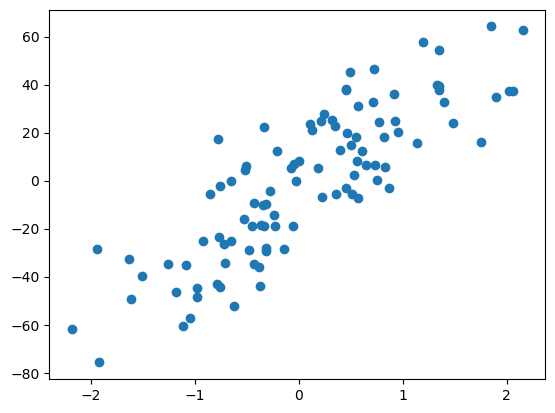

In [9]:
plt.scatter(X, y)

*Applying linear regression w/o regularization and with regularization*

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [16]:
from sklearn.linear_model import Ridge

*Calculating m and b values using sklearn ridge and then will compare the values with my own defined class outcomes*

In [24]:
rr = Ridge(alpha=10)
rr.fit(X, y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [31]:
rr2 = Ridge(alpha = 100)
rr2.fit(X, y)
print(rr2.coef_)
print(rr2.intercept_)

[12.93442104]
-1.4248441496033308


### Observation
without ridge regression:  
m = 27.82, b = -2.29

with **lambda = 10** sklearn's ridge regression:  
m = 24.95, b = -2.12

with **lambda = 100** sklearn's ridge regression:  
m = 12.95, b = -1.42

we can see the change in values due to lambda values

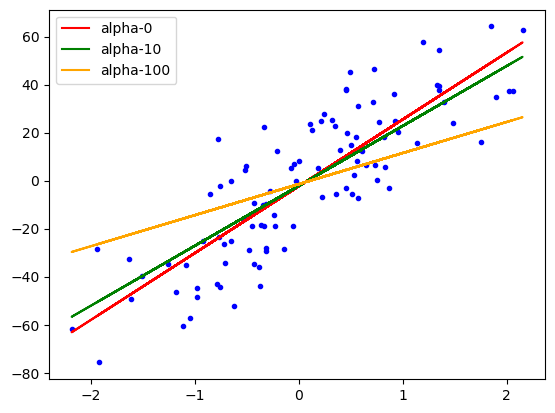

In [37]:
# plotting graph
# plotting all the calculated regression lines
plt.plot(X, y, 'b. ')
plt.plot(X, lr.predict(X), color='red', label='alpha-0')
plt.plot(X, rr.predict(X), color='green', label='alpha-10')
plt.plot(X, rr2.predict(X), color='orange', label='alpha-100')
plt.legend()

# Defining own class

In [46]:
class ridgeRegressor:
    # constructor
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        # calculating 'm' value using derived formula
        numerator = 0
        denomenator = 0

        for i in range(X_train.shape[0]):
            numerator += (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            denomenator += ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())) 

        denomenator += self.alpha
        self.m = numerator / denomenator
        self.b = y_train.mean() - (self.m * X_train.mean())

        print(self.m)
        print(self.b)
        

    def predict(self, X_test):
        pass

In [52]:
reg = ridgeRegressor(100)

In [54]:
reg.fit(X,y)

[12.93442104]
[-1.42484415]


## Generalizing class for N-Dimensional Data

In [58]:
from sklearn.datasets import load_diabetes # built-in dataset
from sklearn.metrics import r2_score
import numpy as np

In [60]:
X, y = load_diabetes(return_X_y=True)

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

In [66]:
from sklearn.linear_model import Ridge

In [68]:
reg = Ridge(alpha=0.1, solver='cholesky') # need to explore solver attribute

In [70]:
reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [72]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.46931288533098037

In [74]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [94]:
class newRidge:
    # constructor
    def __init__(self, alpha = .1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        # adding new column for intercept value in X-matrix
        X_train = np.insert(X_train, 0, 1, axis=1)
        # Identity matrix for Lambda
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train) # W-matrix

        # extracting values
        self.intercept_ = result[0]
        self.coef_ = result[1:]

        print(self.intercept_)
        print(self.coef_)
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [96]:
reg = newRidge()

In [98]:
reg.fit(X_train, y_train)

150.89053425602808
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


In [100]:
y_pred = reg.predict(X_test)

In [102]:
print(r2_score(y_test, y_pred))

0.46931288533098037


*Almost all the values are same, slight change is because in sklearns implementation, **I[0][0] == 1** is set because they don't want to reflect wrong value of intercept as it's a independent of any variable.* 

**After implementing sklearn's logic we got the exact values as the result**